In [1]:
try:
    import torch
    print("successfully imported torch")
    print(torch.__version__)
except ImportError:
    !! pip install torch torchvision torchaudio --user --index-url https://download.pytorch.org/whl/cpu
    print("completed installing torch")

successfully imported torch
2.6.0+cu124


In [2]:
try:
    import numpy as np
    print("successfully imported numpy")
    print(np.__version__)
except ImportError:
    !! pip install numpy --user --upgrade
    print("completed installing numpy")

successfully imported numpy
1.26.4


In [3]:
try:
    from matplotlib import pyplot as plt
    print("successfully imported matplotlib")
except ImportError:
    !! pip install matplotlib --user --upgrade
    print("completed installing matplotlib")

successfully imported matplotlib


In [4]:
!! pip install aenet-gpr --user --upgrade
print("completed installing aenet-gpr")

! pip show aenet-gpr

completed installing aenet-gpr
Name: aenet-gpr
Version: 1.2.9
Summary: Atomistic simulation tools based on Gaussian Processes Regression
Home-page: https://github.com/atomisticnet/aenet-gpr
Author: In Won Yeu
Author-email: iy2185@columbia.edu
License: MPL-2.0
Location: /data/home/iy2185/.local/lib/python3.12/site-packages
Requires: ase, dscribe
Required-by: 


In [5]:
import os, sys, site
sys.path.append(site.USER_SITE)

import aenet_gpr
print(aenet_gpr.__version__)

from aenet_gpr.util import ReferenceData
from aenet_gpr.inout import io_train_parameters

1.2.9


# 1. Read reference training/test data from xsf files

We are using train/test HSE06 data of EC dimer prepared in `aenet-gpr/example/2_EC-EC/`

In [6]:
import os.path

! rm -rf 2_EC-EC
! mkdir 2_EC-EC
    
if os.path.isfile("../example/2_EC-EC/train_set_tutorial.zip"):
    ! unzip -oq ../example/2_EC-EC/train_set_tutorial.zip -d ./2_EC-EC/
    print("number of train data:")
    ! find ./2_EC-EC/train_set_tutorial/ -type f | wc -l
else:
    ! wget https://github.com/atomisticnet/aenet-gpr/raw/refs/heads/main/example/2_EC-EC/train_set_tutorial.zip
    ! unzip -oq train_set_tutorial.zip -d ./2_EC-EC/
    ! rm train_set_tutorial.zip
    print("number of train data:")
    ! find ./2_EC-EC/train_set_tutorial/ -type f | wc -l

--2025-05-25 21:21:24--  https://github.com/atomisticnet/aenet-gpr/raw/refs/heads/main/example/2_EC-EC/train_set_tutorial.zip
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/atomisticnet/aenet-gpr/refs/heads/main/example/2_EC-EC/train_set_tutorial.zip [following]
--2025-05-25 21:21:24--  https://raw.githubusercontent.com/atomisticnet/aenet-gpr/refs/heads/main/example/2_EC-EC/train_set_tutorial.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 101063 (99K) [application/zip]
Saving to: ‘train_set_tutorial.zip’

train_set_tutorial. 100%[===================>]  98.69K  --.-KB/s    in 0.002s  

2025

In [7]:
if os.path.isfile("../example/2_EC-EC/test_set_tutorial.zip"):
    ! unzip -oq ../example/2_EC-EC/test_set_tutorial.zip -d ./2_EC-EC/
    print("number of test data:")
    ! find ./2_EC-EC/test_set_tutorial/ -type f | wc -l
else:
    ! wget https://github.com/atomisticnet/aenet-gpr/raw/refs/heads/main/example/2_EC-EC/test_set_tutorial.zip
    ! unzip -oq test_set_tutorial.zip -d ./2_EC-EC/
    ! rm test_set_tutorial.zip
    print("number of test data:")
    ! find ./2_EC-EC/test_set_tutorial/ -type f | wc -l

--2025-05-25 21:21:26--  https://github.com/atomisticnet/aenet-gpr/raw/refs/heads/main/example/2_EC-EC/test_set_tutorial.zip
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/atomisticnet/aenet-gpr/refs/heads/main/example/2_EC-EC/test_set_tutorial.zip [following]
--2025-05-25 21:21:26--  https://raw.githubusercontent.com/atomisticnet/aenet-gpr/refs/heads/main/example/2_EC-EC/test_set_tutorial.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 148252 (145K) [application/zip]
Saving to: ‘test_set_tutorial.zip’

test_set_tutorial.z 100%[===================>] 144.78K  --.-KB/s    in 0.003s  

2025-05

First, let aenet-gpr read the train/test files

In [8]:
import glob


train_xsf_files = glob.glob("./2_EC-EC/train_set_tutorial/file_*")
train_xsf_files.sort()
train_data = ReferenceData(structure_files=train_xsf_files, file_format='xsf')
train_data.set_data()

print(train_data.energy.shape)
print(train_data.force.shape)

(80,)
(80, 20, 3)


# 2. Model train

In [9]:
if train_data.standardization:
    train_data.standardize_energy_force(train_data.energy)
train_data.config_calculator(kerneltype='sqexp', scale=1.5, weight=1.0)

io_train_parameters(data_param=train_data.write_params())


Training parameters
{'num_data': 80, 'calculator': {'kerneltype': 'sqexp', 'scale': tensor(1.5000, dtype=torch.float64), 'weight': tensor(1., dtype=torch.float64), 'noise': tensor(1.0000e-06, dtype=torch.float64), 'noisefactor': tensor(0.5000, dtype=torch.float64)}, 'fix_ind': None, 'pbc': False, 'species': ['O', 'O', 'O', 'C', 'C', 'C', 'H', 'H', 'H', 'H', 'O', 'O', 'O', 'C', 'C', 'C', 'H', 'H', 'H', 'H'], 'num_atom': 20}



# 3. Evaluation for test set using ASE Calculator

In [10]:
from IPython.display import Image
from aenet_gpr.src import GPRCalculator

In [11]:
try:
    import ase.io
    print("successfully imported ase")
except ImportError:
    !! pip install ase --user --upgrade
    print("completed installing ASE")
    
    import ase.io
    print("successfully imported ase")

successfully imported ase


In [12]:
test_file = ["./2_EC-EC/test_set_tutorial/file_0000.xsf"]
test_data = ReferenceData(structure_files=test_file, file_format='xsf')

print("Reference DFT energy:", test_data.energy)
print("Reference DFT forces:", test_data.force)

Reference DFT energy: [-18642.26998325]
Reference DFT forces: [[[-1.32399475 -1.32399475 -1.32399475]
  [-0.92304765 -0.92304765 -0.92304765]
  [-1.59532558 -1.59532558 -1.59532558]
  [ 1.83111036  1.83111036  1.83111036]
  [-0.59484473 -0.59484473 -0.59484473]
  [ 2.70840812  2.70840812  2.70840812]
  [ 0.38925995  0.38925995  0.38925995]
  [ 0.15550669  0.15550669  0.15550669]
  [ 0.02488009  0.02488009  0.02488009]
  [-0.70488214 -0.70488214 -0.70488214]
  [-0.37657584 -0.37657584 -0.37657584]
  [ 2.00728478  2.00728478  2.00728478]
  [ 0.03323899  0.03323899  0.03323899]
  [ 0.84234494  0.84234494  0.84234494]
  [-1.34529812 -1.34529812 -1.34529812]
  [-1.28327796 -1.28327796 -1.28327796]
  [-0.06006712 -0.06006712 -0.06006712]
  [ 0.02399728  0.02399728  0.02399728]
  [ 0.28590626  0.28590626  0.28590626]
  [-0.09462356 -0.09462356 -0.09462356]]]


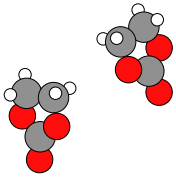

In [13]:
atoms = ase.io.read(test_file[0])
ase.io.write('2EC.png', atoms)
Image("2EC.png")

In [14]:
calc = GPRCalculator(calculator=train_data.calculator, train_energy=train_data.energy)

In [15]:
atoms.calc = calc

In [16]:
print("GPR energy prediction:", atoms.get_potential_energy())
print("GPR forces prediction:", atoms.get_forces())

GPR energy prediction: -18642.283811577345
GPR forces prediction: [[-1.49670338e+00  2.04820476e+00  7.93018770e-01]
 [-9.92569942e-01  6.73663329e-01  1.38801343e-01]
 [-1.39668338e+00  1.93932237e+00  7.44977604e-01]
 [ 1.63304237e+00  5.08586345e-01 -1.54637539e+00]
 [-8.62805370e-01 -1.10728275e+00  2.81601907e+00]
 [ 2.79190881e+00 -3.54909140e+00 -1.16763672e+00]
 [ 4.29450345e-01 -6.21368950e-01  1.07243410e-02]
 [ 2.03483369e-01  6.38835080e-02  1.16148720e-01]
 [ 2.20672756e-01  3.12180991e-02 -1.87620122e+00]
 [-4.73290621e-01 -1.53688694e-02 -2.10870533e-01]
 [-2.81065157e-01  3.19695685e-01 -4.27885583e-01]
 [ 2.26521637e+00 -1.79696881e+00  1.16934239e+00]
 [-6.52543446e-02  2.90690647e+00  1.12525281e+00]
 [ 7.96950081e-01 -1.10307128e+00 -2.54452073e-02]
 [-1.16976339e+00  2.38070918e-01 -1.31131431e+00]
 [-1.53256681e+00 -5.65423802e-01 -1.92247122e+00]
 [ 3.93964600e-02 -2.67278128e-02 -7.34898923e-02]
 [ 1.92419747e-01  6.96224547e-01  9.29640656e-01]
 [ 1.25348325e-0